In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [11]:
df_tesla=pd.read_csv("teslastock.csv", usecols=["date", "open", "high", "low", "close", "volume"], parse_dates=["date"], index_col="date")
df_tesla

,open,high,low,close,volume
date,,,,,
2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000
2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000
2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500
2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500
2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000
...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,106494400


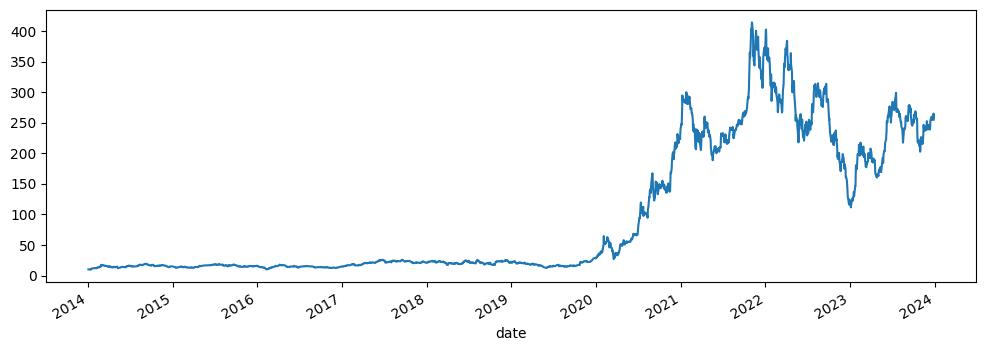

In [7]:
df_tesla["high"].plot(figsize=(12,4))
plt.show()

In [14]:
print(df_tesla.duplicated().sum())

0


In [22]:
pd.DataFrame({"dtypes":df_tesla.isna().sum(), "null_values":df_tesla.dtypes, "unique":[df_tesla[col].nunique() for col in df_tesla.columns]})

,dtypes,null_values,unique
open,0,float64,2389
high,0,float64,2365
low,0,float64,2386
close,0,float64,2449
volume,0,int64,2503


In [13]:
df_tesla.loc["2014-01"]

,open,high,low,close,volume
date,,,,,
2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000
2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000
2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500
2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500
2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000
2014-01-09,10.166667,10.228667,9.790000,9.835333,80730000
2014-01-10,9.897333,9.926667,9.483333,9.714667,111691500
2014-01-13,9.718667,9.800000,9.188000,9.289333,94741500
2014-01-14,9.366667,10.800000,9.111333,10.751333,414105000


This is how we can do code profiling with the help of datetime.now() function

In [30]:
from datetime import datetime

start=datetime.now()
for i in range(50_000_000):
    continue
end= datetime.now()
print(f"Code execution started at: {start}\nCode execution ended at: {end}\nTime taken for the code to execute: {(end- start).seconds} seconds and {(end-start).microseconds} microseconds")

Code execution started at: 2025-02-27 16:02:26.360811
Code execution ended at: 2025-02-27 16:02:28.184397
Time taken for the code to execute: 1 seconds and 823586 microseconds


In [33]:
df_tesla["2014":"2023"].resample(rule="A").min() # rule A signifies year end frequency

C:\Users\iSHAN\AppData\Local\Temp\ipykernel_4544\2954379927.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_tesla["2014":"2023"].resample(rule="A").min() # rule A signifies year end frequency


,open,high,low,close,volume
date,,,,,
2014-12-31,9.366667,9.800000,9.111333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,46210500
2019-12-31,12.073333,12.445333,11.799333,11.931333,36984000
2020-12-31,24.980000,26.990667,23.367332,24.081333,52073100
2021-12-31,184.183334,188.736664,179.830002,187.666672,29401800
2022-12-31,110.349998,116.269997,108.239998,109.099998,41864700


<Axes: xlabel='date'>

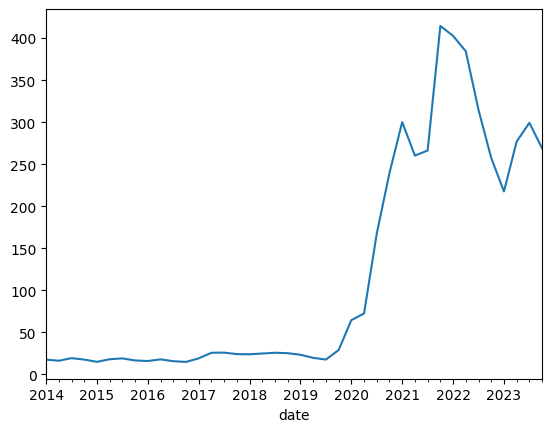

In [34]:
df_tesla.resample(rule="QS").max()["high"].plot()

C:\Users\iSHAN\AppData\Local\Temp\ipykernel_4544\3368633152.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_tesla["open"].resample(rule='M').max().plot(kind='bar', figsize=(15,6))


<Axes: xlabel='date'>

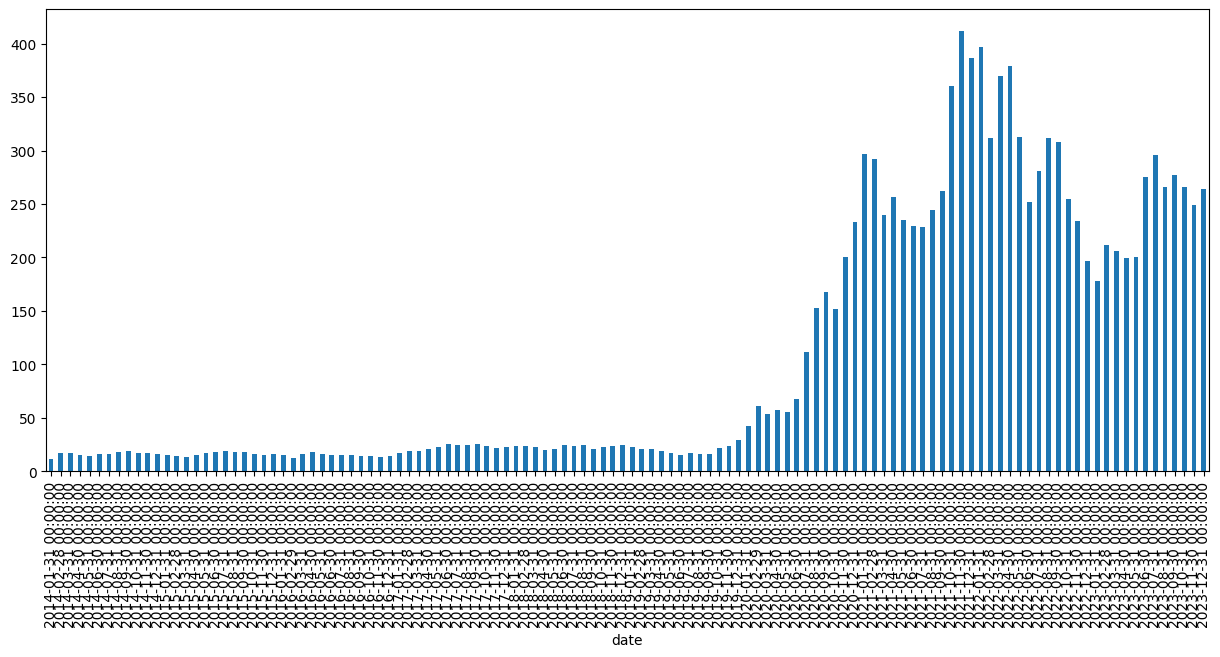

In [35]:
df_tesla["open"].resample(rule='M').max().plot(kind='bar', figsize=(15,6))

In [36]:
df_tesla["high"].rolling(10).mean().head(12)

date
2014-01-02          NaN
2014-01-03          NaN
2014-01-06          NaN
2014-01-07          NaN
2014-01-08          NaN
2014-01-09          NaN
2014-01-10          NaN
2014-01-13          NaN
2014-01-14          NaN
2014-01-15    10.284867
2014-01-16    10.419667
2014-01-17    10.559734
Name: high, dtype: float64

**Simple moving average**: The average of set of values over a window of a specified size of time. 

In [38]:
df_tesla["open rolling avg"]=df_tesla["open"].rolling(10).mean()

<Axes: xlabel='date'>

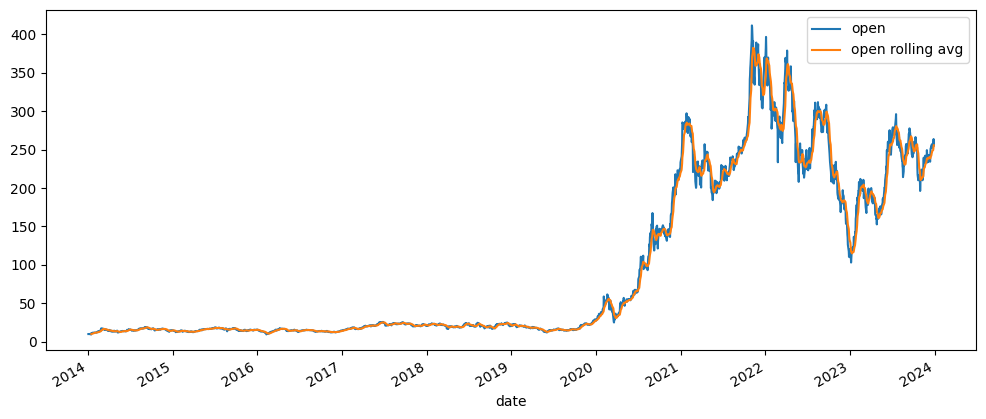

In [40]:
df_tesla[["open","open rolling avg"]].plot(figsize=(12,5))

**Cumulative moving average**: Each new data point updates the average by incorporating all past values up to that instance 

In [42]:
df_tesla["open_CMA"]= df_tesla["open"].expanding().mean()

<Axes: xlabel='date'>

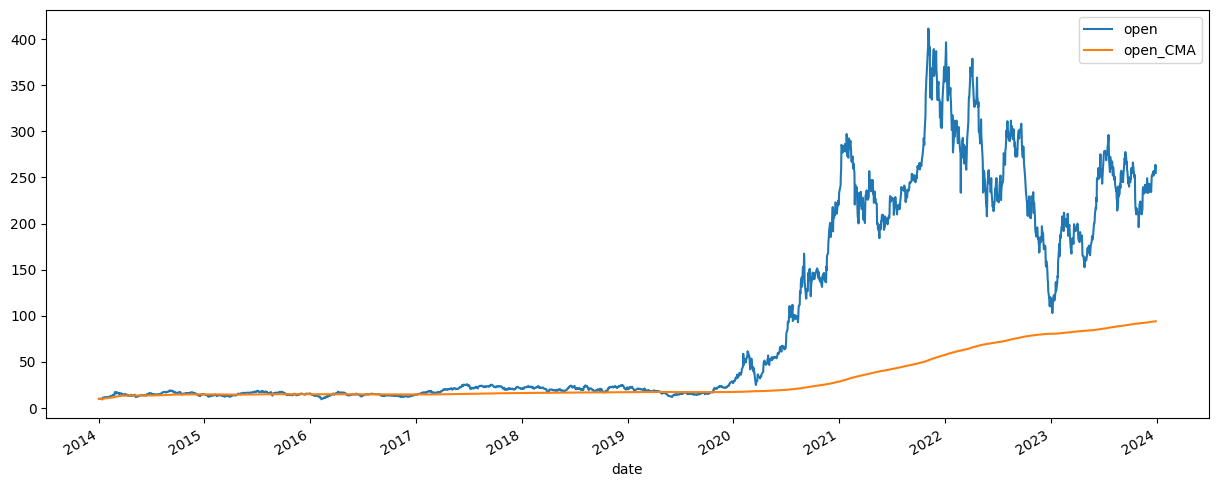

In [43]:
df_tesla[["open","open_CMA"]].plot(figsize=(15,6))

### Exponential Weighted Moving Average
- Recent observations are given exponentially more weight, as opposed to SMA 

- Calculated as follows:<br>

EWMA<sub>t</sub> =αX<sub>t</sub> +(1−α)EWMA<sub>t−1</sub> ,
where
$\alpha= {\frac{2}{N+1}}$
​


In [46]:
df_tesla['EWMA_0.2'] = df_tesla['open'].ewm(alpha=0.2, adjust=False).mean()

In [47]:
df_tesla['EWMA_5d']= df_tesla["open"].ewm(span=100, adjust=False).mean()

<Axes: xlabel='date'>

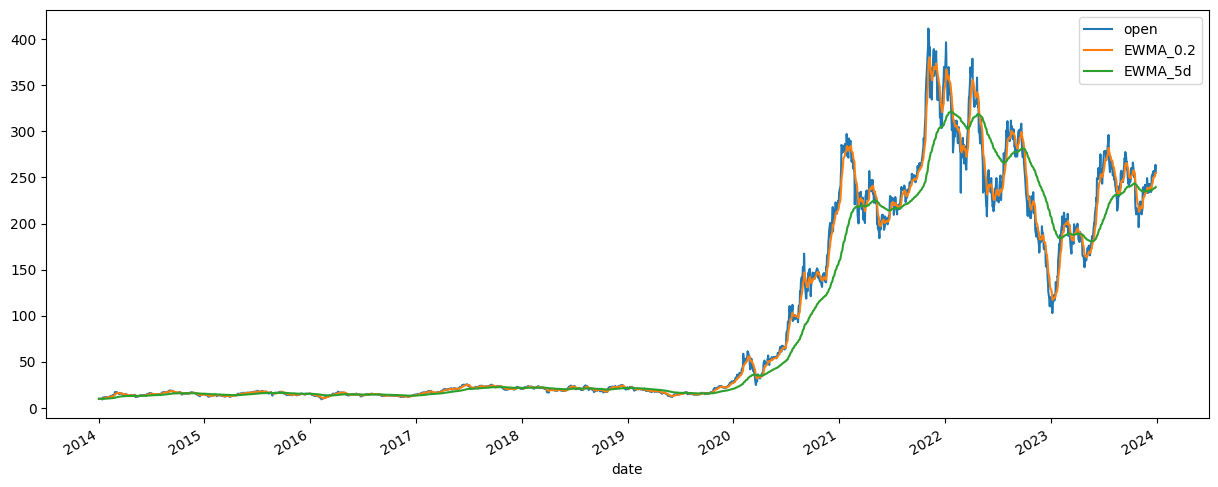

In [48]:
df_tesla[['open', "EWMA_0.2", 'EWMA_5d']].plot(figsize=(15,6))